<a href="https://colab.research.google.com/github/joanitolopo/customer-segmentation/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!pip install kmodes

In [5]:
# import main library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import librries for clustering
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from tqdm.auto import tqdm

from sklearn.preprocessing import LabelEncoder, StandardScaler

Import Data

In [7]:
#!git clone https://github.com/joanitolopo/customer-segmentation.git

In [9]:
data = pd.read_csv("/content/customer-segmentation/data/data_cleaned.csv", index_col=["ID"])
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,TotalAcceptedCmp,NumTotalPurchases
ID,,,,,,,,,,,,,,,
5524,Second,Single,58138.0,0,0,58,635,88,546,172,88,88,0,1,32
2174,Second,Single,46344.0,1,1,38,11,1,6,2,1,6,0,0,11
4141,Second,relationship,71613.0,0,0,26,426,49,127,111,21,42,0,0,25
6182,Second,relationship,26646.0,1,0,26,11,4,20,10,3,5,0,0,14
5324,Third,relationship,58293.0,1,0,94,173,43,118,46,27,15,0,0,24


In [11]:
# Split data for segmentation, use data product
product = data[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts"]]
product.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
ID,,,,,
5524,635,88,546,172,88
2174,11,1,6,2,1
4141,426,49,127,111,21
6182,11,4,20,10,3
5324,173,43,118,46,27


Find Best Cluster for data use Elbow analysis

  0%|          | 0/8 [00:00<?, ?it/s]

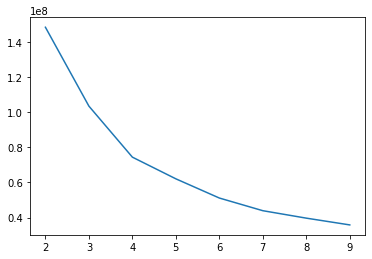

In [13]:
score = []
for k in tqdm(range(2, 10)):
    model = KMeans(n_clusters=k, init="k-means++")
    member = model.fit(product)
    score.append(model.inertia_)

plt.plot(range(2, 10), score)

In [ ]:
# We can see in visualization, looks like best cluster in 3 or 4
# I have training both of them, and 3 looks good.
# So we will train with cluster = 3

Training

In [15]:
model = KMeans(n_clusters=3)
cluster = model.fit_predict(product)

In [17]:
df_pred = product.copy()
df_pred["cluster"] = cluster 
df_pred.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,cluster
ID,,,,,,
5524,635,88,546,172,88,1
2174,11,1,6,2,1,0
4141,426,49,127,111,21,1
6182,11,4,20,10,3,0
5324,173,43,118,46,27,0


Analyze Cluster

In [18]:
# We use centroid each cluster
clust_cent = model.cluster_centers_
df_cluster = pd.DataFrame(clust_cent, columns=product.columns)
df_cluster

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,71.831900,9.906177,38.865520,13.116497,9.662236
1,451.302100,47.277868,309.552504,71.956381,50.676898
2,958.660377,51.792453,404.845912,69.459119,50.845912


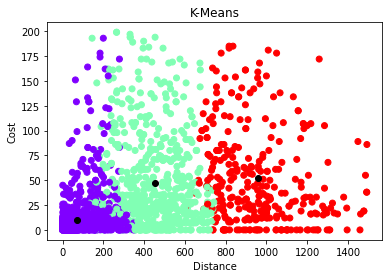

In [19]:
plt.scatter(product.values[:,0], product.values[:,1], c=model.labels_, cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1], color = 'black')
plt.title('K-Means')
plt.xlabel('Distance')
plt.ylabel('Cost') 
plt.show()

In [ ]:
# Yay, we have greate cluster, they are separated to each other
# We will do some analysis

In [21]:
pd.set_option('max_rows',None)
df_new = product.copy()
df_new['cluster'] = model.labels_
df_new.groupby('cluster').agg(['median' ,'mean'])

MntWines             MntFruits  ... MntFishProducts MntSweetProducts           
          median        mean    median  ...            mean           median       mean
cluster                                 ...                                            
0           31.0   71.831900         3  ...       13.116497              3.0   9.662236
1          452.0  451.302100        28  ...       71.956381             33.0  50.676898
2          929.5  958.660377        37  ...       69.459119             35.5  50.845912

[3 rows x 10 columns]